In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv('./dataset/train.csv')

In [103]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [104]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [105]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

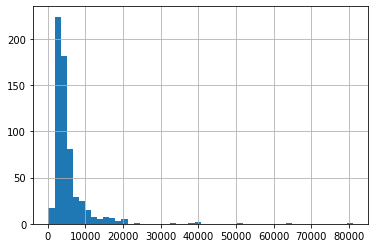

In [106]:
df['ApplicantIncome'].hist(bins=50)

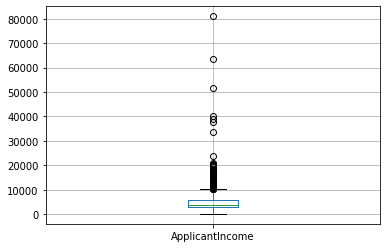

In [107]:
df.boxplot(column='ApplicantIncome')

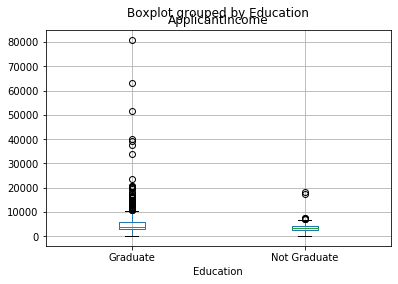

In [108]:
df.boxplot(column='ApplicantIncome', by='Education')

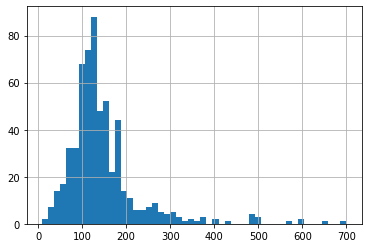

In [109]:
df['LoanAmount'].hist(bins=50)

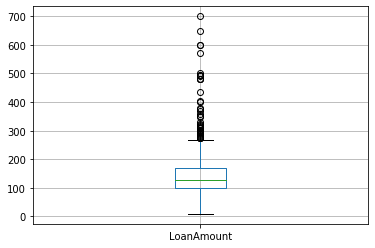

In [110]:
df.boxplot(column='LoanAmount')

In [111]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values="Loan_Status", index=['Credit_History'],
                       aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print('Frequency Table for Credit History:')
print(temp1)

print('\nProbability of getting loan for each Credit History class:')
print(temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probability of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [112]:
temp_self = df['Self_Employed'].value_counts(ascending=True)
temp_self_status = df.pivot_table(values='Loan_Status', index=['Self_Employed'], 
                                  aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print(temp_self)
print(temp_self_status)

Yes     82
No     500
Name: Self_Employed, dtype: int64
               Loan_Status
Self_Employed             
No                0.686000
Yes               0.682927


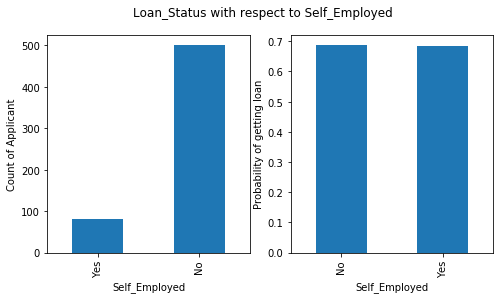

In [113]:
fig = plt.figure(figsize=(8, 4))
fig.suptitle('Loan_Status with respect to Self_Employed')
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Self_Employed')
ax1.set_ylabel('Count of Applicant')
temp_self.plot(kind='bar', ax=ax1)
ax2 = fig.add_subplot(122)
ax2.set_xlabel('Self_Employed')
ax2.set_ylabel('Probability of getting loan')
temp_self_status.plot(kind='bar', legend=None, ax=ax2)

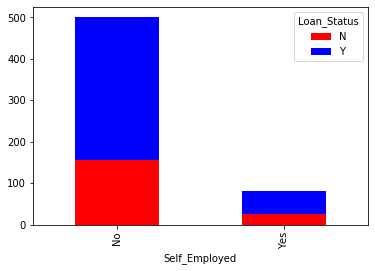

In [114]:
temp_loan_self = pd.crosstab(df['Self_Employed'], df['Loan_Status'])
temp_loan_self.plot(kind='bar', stacked=True, color=['red', 'blue'], grid=False)

Text(0, 0.5, 'Probability of getting loan')

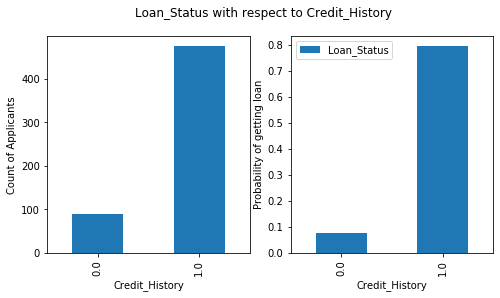

In [115]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('Loan_Status with respect to Credit_History')
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
temp1.plot(kind='bar', ax=ax1)

ax2 = fig.add_subplot(122)
temp2.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')

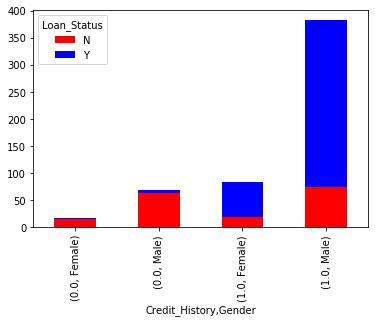

In [116]:
temp3 = pd.crosstab([df['Credit_History'], df['Gender']], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [117]:
married_count = df['Married'].value_counts(ascending=True)
married_loan = df.pivot_table(values='Loan_Status', index='Married',
                             aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print(married_count)
print(married_loan)

No     213
Yes    398
Name: Married, dtype: int64
         Loan_Status
Married             
No          0.629108
Yes         0.716080


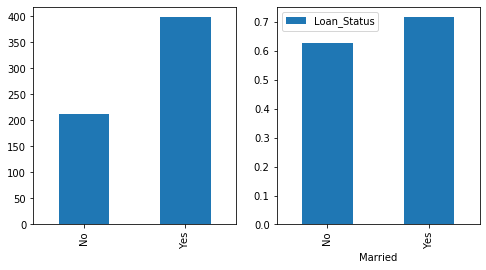

In [118]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
married_count.plot(kind='bar', ax=ax1)
ax2 = fig.add_subplot(122)
married_loan.plot(kind='bar', ax=ax2)

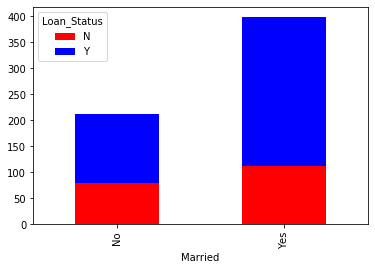

In [119]:
temp3 = pd.crosstab(df['Married'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [120]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [121]:
print(df['Gender'].value_counts())
print(df.pivot_table(values='Loan_Status', index='Gender',
                    aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean()))

Male      489
Female    112
Name: Gender, dtype: int64
        Loan_Status
Gender             
Female     0.669643
Male       0.693252


In [122]:
def fill_gender(x):
    return np.random.choice(['Male','Female'],size=1,p=[0.814,0.186])[0]
df['Gender'].fillna(df[df['Gender'].isnull()].apply(fill_gender, axis=1),inplace=True)

In [123]:
print(df['Gender'].value_counts())

Male      499
Female    115
Name: Gender, dtype: int64


In [124]:
df['Self_Employed'].fillna('No', inplace=True)

In [125]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [126]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)
print(table)

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0


In [127]:
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [130]:
print(df['Married'].value_counts())

Yes    398
No     213
Name: Married, dtype: int64


In [131]:
398/(213+398)

0.6513911620294599

In [134]:
def fill_married(x):
    return np.random.choice(['Yes','No'],size=1,p=[0.651,0.349])[0]
df['Married'].fillna(df[df['Married'].isnull()].apply(fill_married, axis=1),inplace=True)

In [135]:
print(df['Married'].value_counts())

Yes    401
No     213
Name: Married, dtype: int64


In [137]:
print(df['Dependents'].value_counts())

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


In [139]:
print([345/599, 102/599, 101/599, 51/599])

[0.5759599332220368, 0.17028380634390652, 0.1686143572621035, 0.08514190317195326]


In [142]:
def fill_dependents(x):
    return np.random.choice(['0', '1', '2', '3+'],size=1,p=[0.5759599332220368, 
                                                    0.17028380634390652, 0.1686143572621035, 0.08514190317195326])[0]
df['Dependents'].fillna(df[df['Dependents'].isnull()].apply(fill_dependents, axis=1),inplace=True)

In [143]:
print(df['Dependents'].value_counts())

0     354
1     104
2     103
3+     53
Name: Dependents, dtype: int64


In [175]:
a = df['Loan_Amount_Term'].unique().tolist()
del a[3]
p = []
for x in a:
    p.append(x/sum(a))

In [168]:
def fill_loan_amount_term(x):
    return np.random.choice(a,size=1,p=p)[0]
df['Loan_Amount_Term'].fillna(df[df['Loan_Amount_Term'].isnull()].apply(fill_loan_amount_term, axis=1),inplace=True)

In [170]:
print(df['Credit_History'].value_counts())

1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [176]:
[475/(475+89), 89/(475+89)]

[0.8421985815602837, 0.15780141843971632]

In [177]:
def fill_credit_his(x):
    return np.random.choice([1.0, 0.0],size=1,p=[0.8421985815602837, 0.15780141843971632])[0]
df['Credit_History'].fillna(df[df['Credit_History'].isnull()].apply(fill_credit_his, axis=1),inplace=True)

In [178]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64